<h2><b>Input : </b></h2>

*   train_microarray.csv

<h2><b>Output : </b></h2>

* rf1_features.pkl
* rf2_features.pkl
* rf3_features.pkl
* ab1_features.pkl
* ab2_features.pkl
* ab3_features.pkl


# Run All

## Import dan Load

Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import joblib

Mengatur Style

In [ ]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Load Dataset berupa Data Train

In [ ]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1_r9KdY3hz2zVtCD6VZs2nHrnXBGbia8v')

Melihat Dataset

In [ ]:
df_train.head()

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Label
0,2.433180,2.607790,2.560086,2.672850,2.223647,2.894223,2.730180,2.296307,2.830512,2.516603,...,1.983564,1.823051,1.624148,1.746413,2.416191,2.769184,1.810729,1.983368,3.048148,1.0
1,2.261091,2.407899,2.690311,2.641439,2.350872,3.042087,2.856150,2.348777,2.800074,2.482005,...,2.005752,1.882906,1.610521,1.559600,2.373979,2.834765,1.751637,1.976622,2.972135,0.0
2,2.385914,2.652312,2.558252,2.510368,1.996011,2.624352,2.491994,2.344569,2.781115,2.443602,...,1.687534,1.752161,1.659076,1.772656,2.515434,2.749401,1.864134,2.017966,3.046458,1.0
3,2.262845,2.547491,2.747016,2.747069,2.666440,2.893101,2.998907,2.217520,2.718585,2.482671,...,1.803458,1.882303,1.802360,1.722986,2.048850,2.833805,2.149566,2.319459,2.724557,1.0
4,2.239799,2.501600,2.721664,2.785209,2.600757,3.116527,2.977250,2.328208,2.875340,2.543112,...,1.864520,1.888038,1.832892,1.732615,2.193482,2.834802,1.781193,2.141133,2.986475,0.0


Melihat Ukuran Dataset

In [ ]:
df_train.shape

(130, 22216)

## Missing Value

Melakukan pengecekan Missing Value

In [ ]:
missing_value = df_train.isna().sum()
count = 0

for i in range(0,len(missing_value)):
  if (missing_value[i] != 0):
    count += 1

print('Missing Value sebanyak', count, 'kolom')

Missing Value sebanyak 0 kolom


## Duplikat Kolom

Melakukan Pengecekan Kolom

In [ ]:
len(np.unique(df_train.columns))

22216

## Reduksi Fitur Standard Deviation

Visualisasi Simpangan Baku setiap Kolom/Fitur

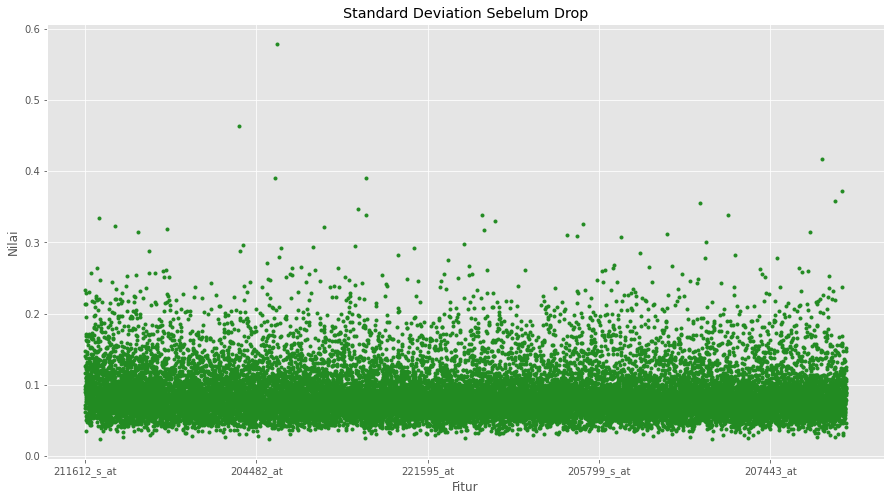

In [ ]:
df_train.iloc[:,:-1].std().plot(style='.', color='forestgreen')
plt.title('Standard Deviation Sebelum Drop')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.show()

Memfilter Kolom dengan Simpangan Baku < 0.1 dan menghasilkan list berupa index-index dari kolom yang akan didrop

In [ ]:
simpangan_baku = df_train.iloc[:,:-1].std()
drop_kolom_index = []

for i in range(0,len(simpangan_baku)):
  if (simpangan_baku[i] < 0.1):
    drop_kolom_index.append(i)

print(len(drop_kolom_index))

16860


Mengubah index yang akan didrop tersebut menjadi nama kolom

In [ ]:
drop_kolom = []

for i in range(0,len(drop_kolom_index)):
  drop_kolom.append(df_train.columns[drop_kolom_index[i]])

print(len(drop_kolom))

16860


Ukuran setelah melakukan Drop

In [ ]:
df_train.drop(columns=drop_kolom, inplace=True)
df_train.shape

(130, 5356)

Visualisasi setelah dilakukan drop

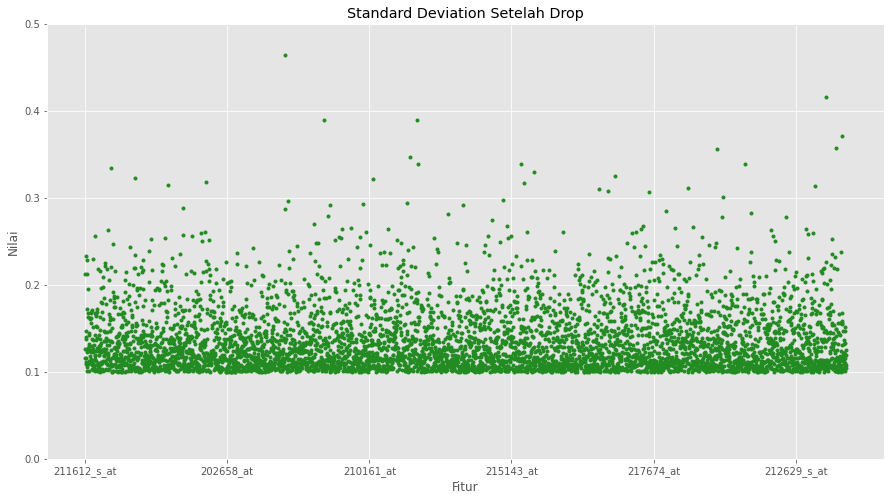

In [ ]:
df_train.iloc[:,:-1].std().plot(style='.', color='forestgreen')
plt.title('Standard Deviation Setelah Drop')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.ylim(0,0.5)
plt.show()

## Split X_train dan y_train

Melakukan Split untuk X_train dan y_train

In [ ]:
X = df_train.iloc[:,:-1]
X.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,209703_x_at,...,203868_s_at,201488_x_at,220394_at,212055_at,203460_s_at,204971_at,209395_at,208938_at,219777_at,222150_s_at
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.636799,...,1.952270,2.864931,1.657045,2.757382,2.818769,3.177515,1.729641,1.983564,1.746413,2.416191
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.782383,...,1.821324,2.743461,1.663437,2.808874,2.835889,3.229470,1.805189,2.005752,1.559600,2.373979
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.422551,...,2.012130,2.975771,1.735791,2.712590,2.804040,3.336795,1.727185,1.687534,1.772656,2.515434
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,2.685958,...,2.010799,2.549080,2.053929,2.454013,2.154950,2.834433,1.946313,1.803458,1.722986,2.048850
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.700011,...,1.950056,2.749509,1.891938,2.705312,2.672296,3.283322,1.741942,1.864520,1.732615,2.193482


In [ ]:
y = df_train.iloc[:,-1]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Label, dtype: float64

## Seleksi Fitur

### Select KBest 

Menentukan nilai K

In [ ]:
nilai_k = [100,200,300,400,500,600,700,800,900,1000]

Chi2

In [ ]:
list_fitur = []

for k in nilai_k:
  seleksi_chi2 = SelectKBest(score_func=chi2, k=k)
  hasil_chi2 = seleksi_chi2.fit(X,y)
  list_fitur.append(list(hasil_chi2.get_feature_names_out()))

for i in range(0,len(list_fitur)):
  for j in range(0,len(list_fitur[i])):
    if (list_fitur[i][j] == 'Label'):
      print(i,j)

Pembuatan Model

In [ ]:
rf_seleksi = RandomForestClassifier()
ab_seleksi = AdaBoostClassifier()

rf_akurasi = []
ab_akurasi = []

### Random Forest

Nilai Akurasi Cross Val pada masing-masing K

In [ ]:
print("====================RANDOM FOREST====================")
for i in range(0,len(nilai_k)):
  score = cross_val_score(rf_seleksi, X[list_fitur[i]], y, scoring="accuracy", cv=10)
  print("\nNilai K=" + str(nilai_k[i]))
  print("Akurasi masing-masing = ")
  print(score)
  print("Rata-rata = ", score.mean())
  rf_akurasi.append(score.mean())

====================RANDOM FOREST====================

Nilai K=100
Akurasi masing-masing = 
[0.61538462 0.76923077 0.69230769 0.76923077 0.76923077 0.69230769
 0.53846154 0.84615385 0.61538462 0.69230769]
Rata-rata =  0.7000000000000001

Nilai K=200
Akurasi masing-masing = 
[0.53846154 0.76923077 0.61538462 0.76923077 0.76923077 0.61538462
 0.53846154 0.92307692 0.76923077 0.69230769]
Rata-rata =  0.7

Nilai K=300
Akurasi masing-masing = 
[0.61538462 0.76923077 0.61538462 0.84615385 0.76923077 0.61538462
 0.69230769 0.76923077 0.69230769 0.76923077]
Rata-rata =  0.7153846153846154

Nilai K=400
Akurasi masing-masing = 
[0.76923077 0.61538462 0.69230769 0.76923077 0.76923077 0.61538462
 0.61538462 0.76923077 0.69230769 0.76923077]
Rata-rata =  0.7076923076923076

Nilai K=500
Akurasi masing-masing = 
[0.69230769 0.76923077 0.61538462 0.76923077 0.84615385 0.61538462
 0.46153846 0.76923077 0.76923077 0.69230769]
Rata-rata =  0.7

Nilai K=600
Akurasi masing-masing = 
[0.69230769 0.84615385 

Menyimpan Top 3 Features

In [ ]:
top3_rf_index = sorted(range(len(rf_akurasi)), key=lambda i: rf_akurasi[i])[-3:]

rf1_features = list_fitur[top3_rf_index[0]]
rf2_features = list_fitur[top3_rf_index[1]]
rf3_features = list_fitur[top3_rf_index[2]]

print("Banyak fitur terpilih pada Random Forest: ")
for i in range(0, len(top3_rf_index)):
  print("RF" + str(i+1) + " =", nilai_k[top3_rf_index[i]])

Banyak fitur terpilih pada Random Forest: 
RF1 = 600
RF2 = 700
RF3 = 1000


### AdaBoost

Nilai Akurasi Cross val pada masing-masing K

In [ ]:
print("====================ADABOOST====================")
for i in range(0,len(nilai_k)):
  score = cross_val_score(ab_seleksi, X[list_fitur[i]], y, scoring="accuracy", cv=10)
  print("\nNilai K=" + str(nilai_k[i]))
  print("Akurasi masing-masing = ")
  print(score)
  print("Rata-rata = ", score.mean())
  ab_akurasi.append(score.mean())

====================ADABOOST====================

Nilai K=100
Akurasi masing-masing = 
[0.61538462 0.69230769 0.69230769 0.92307692 0.92307692 0.46153846
 0.61538462 0.84615385 0.53846154 0.84615385]
Rata-rata =  0.7153846153846154

Nilai K=200
Akurasi masing-masing = 
[0.61538462 0.61538462 0.76923077 0.84615385 0.76923077 0.76923077
 0.84615385 0.76923077 0.61538462 0.76923077]
Rata-rata =  0.7384615384615384

Nilai K=300
Akurasi masing-masing = 
[0.84615385 0.69230769 0.61538462 0.84615385 0.61538462 0.61538462
 0.84615385 0.69230769 0.69230769 0.76923077]
Rata-rata =  0.7230769230769231

Nilai K=400
Akurasi masing-masing = 
[0.84615385 0.69230769 0.61538462 0.84615385 0.76923077 0.69230769
 0.84615385 0.84615385 0.69230769 0.76923077]
Rata-rata =  0.7615384615384616

Nilai K=500
Akurasi masing-masing = 
[0.61538462 0.76923077 0.92307692 0.92307692 0.84615385 0.61538462
 0.76923077 0.84615385 0.61538462 0.76923077]
Rata-rata =  0.7692307692307693

Nilai K=600
Akurasi masing-masing =

In [ ]:
top3_ab_index = sorted(range(len(ab_akurasi)), key=lambda i: ab_akurasi[i])[-3:]

ab1_features = list_fitur[top3_ab_index[0]]
ab2_features = list_fitur[top3_ab_index[1]]
ab3_features = list_fitur[top3_ab_index[2]]

print("Banyak fitur terpilih pada AdaBoost: ")
for i in range(0, len(top3_ab_index)):
  print("AB" + str(i+1) + " =", nilai_k[top3_ab_index[i]])

Banyak fitur terpilih pada AdaBoost: 
AB1 = 200
AB2 = 400
AB3 = 500


### Visualisasi Akurasi Cross Val Model terhadap Banyak Fitur

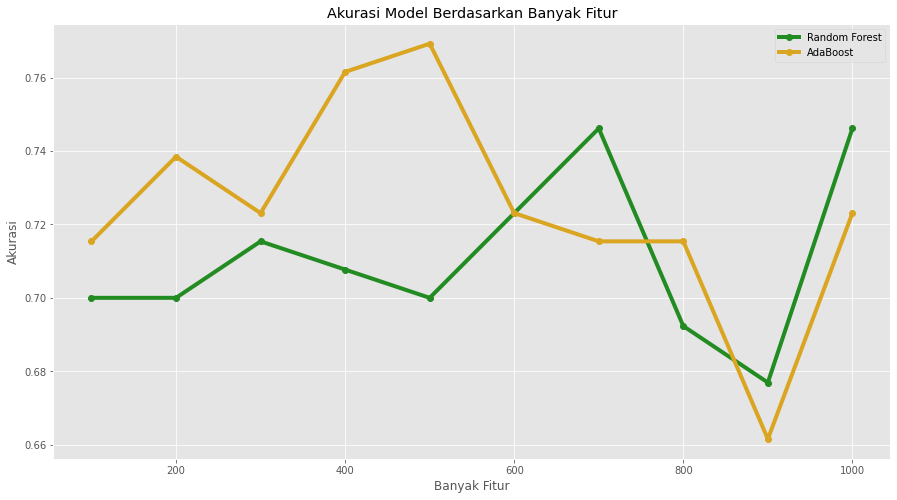

In [ ]:
plt.plot(nilai_k, rf_akurasi, linewidth=4, marker='o', color='forestgreen')
plt.plot(nilai_k, ab_akurasi, linewidth=4, marker='o', color='goldenrod')
plt.title('Akurasi Model Berdasarkan Banyak Fitur')
plt.xlabel('Banyak Fitur')
plt.ylabel('Akurasi')
plt.legend(['Random Forest', 'AdaBoost', 'Rata-rata'])
plt.show()

Append dengan Label

In [ ]:
rf1_features.append('Label')
rf2_features.append('Label')
rf3_features.append('Label')
ab1_features.append('Label')
ab2_features.append('Label')
ab3_features.append('Label')

Menjamin agar tidak ada nama yang sama

In [ ]:
rf1_features = list(dict.fromkeys(rf1_features))
rf2_features = list(dict.fromkeys(rf2_features))
rf3_features = list(dict.fromkeys(rf3_features))
ab1_features = list(dict.fromkeys(ab1_features))
ab2_features = list(dict.fromkeys(ab2_features))
ab3_features = list(dict.fromkeys(ab3_features))

Banyak kolom (termasuk Label)

In [ ]:
print(len(rf1_features))
print(len(rf2_features))
print(len(rf3_features))
print(len(ab1_features))
print(len(ab2_features))
print(len(ab3_features))

601
701
1001
201
401
501


Melihat contoh Dataframe yang sudah diseleksi fitur

In [ ]:
df_feature = df_train[rf3_features]
df_feature.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,209703_x_at,...,206306_at,201339_s_at,208663_s_at,206989_s_at,211122_s_at,208783_s_at,217744_s_at,210262_at,205000_at,Label
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.636799,...,2.484063,2.794302,2.222248,2.517680,1.640793,2.725763,2.968616,2.677457,2.769188,1.0
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.782383,...,2.420429,2.788661,2.023768,2.382785,1.631703,2.666336,3.043781,2.404486,1.775516,0.0
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.422551,...,2.345234,2.921265,2.801283,2.455795,1.743189,2.672883,2.983373,2.338139,1.905060,1.0
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,2.685958,...,2.158047,1.703865,2.047562,2.118865,1.641713,1.769595,2.130954,2.115575,1.903239,1.0
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.700011,...,2.398079,2.395988,2.027367,2.319605,1.529461,2.372409,2.728668,2.080586,1.801010,0.0


## Visualisasi Sample

Pemisahan kanker dan tidak kanker

In [ ]:
kanker = df_feature[df_feature['Label'] == 1.0]
tidak = df_feature[df_feature['Label'] == 0.0]

In [ ]:
vis = df_feature.sample(3, axis=1)
vis

,219775_s_at,205033_s_at,203333_at
0,2.334361,2.368650,2.949391
1,2.445609,2.405635,2.834503
2,2.358878,2.391431,2.843616
3,2.684266,2.473243,2.596420
4,2.494581,2.294168,2.660415
...,...,...,...
125,2.574978,2.293545,2.750613
126,2.425026,2.634664,2.797546
127,2.451593,2.322024,2.833068
128,2.545564,2.329918,2.676158


In [ ]:
nama_kolom = vis.columns
nama_kolom

Index(['219775_s_at', '205033_s_at', '203333_at'], dtype='object')

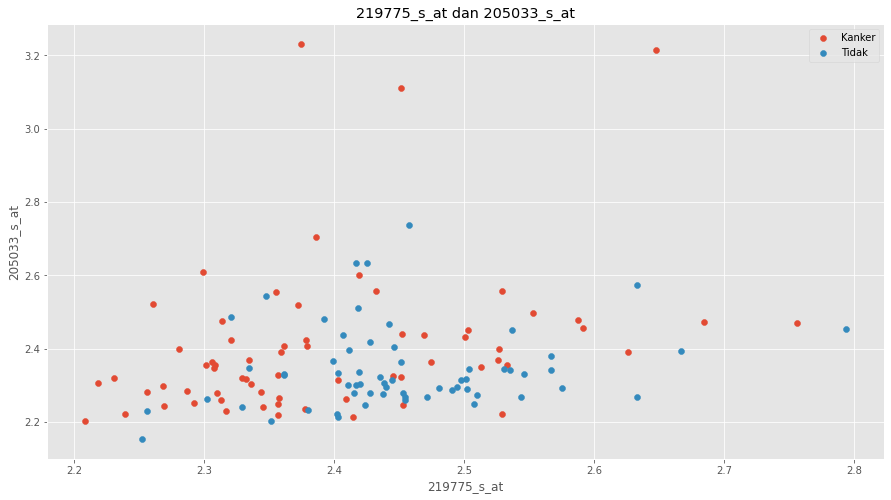

In [ ]:
plt.scatter(x=kanker[nama_kolom[0]], y=kanker[nama_kolom[1]])
plt.scatter(x=tidak[nama_kolom[0]], y=tidak[nama_kolom[1]])
plt.title(nama_kolom[0] + ' dan ' + nama_kolom[1])
plt.xlabel(nama_kolom[0])
plt.ylabel(nama_kolom[1])
plt.legend(['Kanker', 'Tidak'])
plt.show()

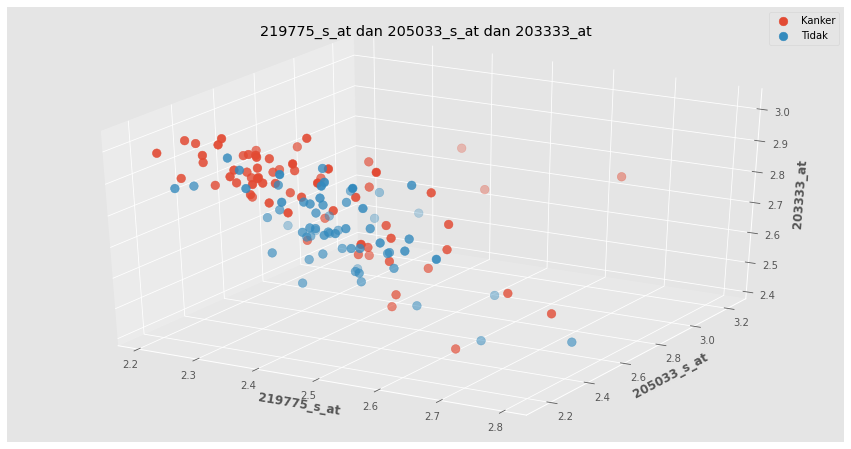

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter(kanker[nama_kolom[0]], kanker[nama_kolom[1]], kanker[nama_kolom[2]], s=75)
ax.scatter(tidak[nama_kolom[0]], tidak[nama_kolom[1]], tidak[nama_kolom[2]], s=75)

plt.title(nama_kolom[0] + ' dan ' + nama_kolom[1] + ' dan ' + nama_kolom[2])
ax.set_xlabel(nama_kolom[0], fontweight ='bold')
ax.set_ylabel(nama_kolom[1], fontweight ='bold')
ax.set_zlabel(nama_kolom[2], fontweight ='bold')

plt.legend(['Kanker', 'Tidak'])
plt.show()

## Export

Melakukan Export untuk best feature

In [ ]:
joblib.dump(rf1_features, 'rf1_features.pkl')
joblib.dump(rf2_features, 'rf2_features.pkl')
joblib.dump(rf3_features, 'rf3_features.pkl')
joblib.dump(ab1_features, 'ab1_features.pkl')
joblib.dump(ab2_features, 'ab2_features.pkl')
joblib.dump(ab3_features, 'ab3_features.pkl')

['ab3_features.pkl']